O conjunto de dados para este projeto se origina do [Repositório de Machine Learning UCI](https://archive.ics.uci.edu/ml/datasets/Census+Income)

In [116]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import LearningCurve

%matplotlib inline

## Carregando os dados

In [115]:
data = pd.read_csv("census.csv")
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Definindo variável alvo e preditoras

In [62]:
y = data['income']
X = data.drop('income', axis = 1)

## Processando os dados

In [63]:
scaler = MinMaxScaler()

numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

X_minmax_transform = pd.DataFrame(X)
X_minmax_transform[numerical] = scaler.fit_transform(X_minmax_transform[numerical])

In [64]:
X_minmax_transform.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


In [65]:
X = pd.get_dummies(X_minmax_transform)

y = y.map({"<=50K":0,">50K":1})

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

## Definindo os modelos

**Modelo 1: Random Forest (Florestas Aleatórias)**

    O algoritimo de Florestas Aleatórias é aplicado na medicina para indentificar determinar diagonisticos, em casos de fraudes em bancos e classificação de imagens.

    Vantagens: Ser simples e então é facil de ser explicado, é muito capaz de lidar com variaeis categoricas e em grandes quantidades (várias dimenções), diferente das ávores de decisão, as florestas aleátrorias não tendem a ficar sobreajustadas (overffining) já que combina o conjunto de ávores e indentifica as caracteristicas mais importante durante o processo de treinamento.

    Desvantagens: Tempo de predição costuma de ser mais alto por trainer vários modelos menores e são um pouco mais complextas de esplicar do que o algoritimo de arvore de decisão.

    Esse modelo pode ser aplicado por cojunto de dados ter muitas variaveis catégorias e ser um caso de classificação binária.

**Modelo 2: Gradient Boosting**

    O modelo gradient boosting é aplicado em algoritimos de classificação.

    Vantagens: Ideal para grande conjuntos de dados com variaveis categorias e numericas, tem poucos parametros então é simples de calibrar, e consegue lidar com dados não linares e várias dimenções ( muitas variavéis)

    Desvantagens:  Tempo de treinamento alto, nao performa bem em um conjunto de dados pequeno

    Esse modelo pode ser aplicado no conjunto de dados por ter o tamanho o suficiente e estár "limpo", além de ser o caso de classificação.

**Modelo 3: Logistic Regression (Regressão Logistica)**

    O modelo de regressão logistica é usado em casos de classficação bináriam, como por exemplo de calssificar se o cliente irá ou não contratar o serviço proposto.

    Vantagens: Baixo tempo de resposta (Treinamento/Predição), lida muito bem que dados categóricos.

    Desvantagens: Usa uma curva de desição ou seja, não é capaz de indentificar padroes complexos caso existam.

    O caso de estudo é uma classificação binária, então vale apena testar a regressão logistica.

In [69]:
clf_A = GradientBoostingClassifier(random_state = 42)
clf_B = RandomForestClassifier(random_state = 42)
clf_C = LogisticRegression(random_state=42)

In [110]:
def learnning_curve_train_test(clf,X_train,y_train):
    cv = StratifiedKFold(n_splits=4)
    sizes = np.linspace(0.3, 1.0, 5)
    visualizer = LearningCurve(
        clf, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4
    )
    visualizer.fit(X_train, y_train)
    visualizer.show()

/home/daniel/miniconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


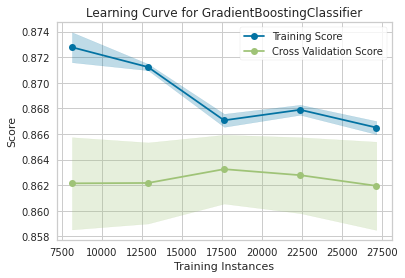

In [111]:
learnning_curve_train_test(clf_A,X_train,y_train)

/home/daniel/miniconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


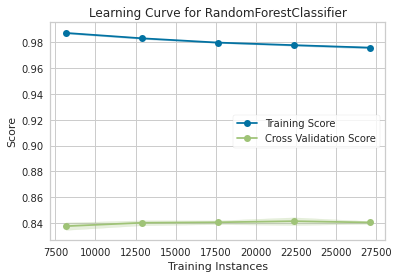

In [112]:
learnning_curve_train_test(clf_B,X_train,y_train)

/home/daniel/miniconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


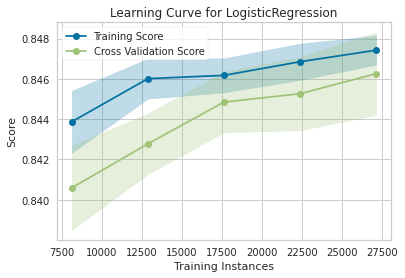

In [117]:
learnning_curve_train_test(clf_C,X_train,y_train)

## Avaliando cada algoritimo separadamente:

**Gradient Boosting Classifier**

    O modelo teve o melhores scores dentre os testado, durante a sua validação, houve uma boa curva de aprendizado enquanto o tamanho do cojunto de treino/teste, convergindo no final não ficando "overfited", porém com mais dados o modelo possa ainda melhorar, o modelo teve de longe o maior tempo de treinamento, porém esse parametro não é pertinente para a aplicação então será descartado, devido a sua maior pontuação, esse é o modelo escolhido.

**Random Forest Classifier**

    O modelo claramente ficou "overffit", basta obersevar como ele se comportou com o aumento dos pontos de treino e teste, ele tem boa pontuação com poucos pontos no cojunto de treino e a perfomace cai enquanto o número de pontos de treinamento aumenta, oposto aconte com o resutado com o cojunto de teste, eles parecem que tendem a convegir mas aparemente nao tivemos dados o suficiente, imaginando a curva de aprendizado, haveria uma expressiva distância entre as curvas com isso confirmo que o modelo nas atuais condições o modelo está "overffited", o tempo de treinamento e predição são exelentes o mesmo treinou e preveu com 100% dos pontos de treinamento em menos de 1 segundo, o modelo atingiu mais de 80% de acurácia significa que o modelo teve no geral uma boa adequação no cojunto de dados, conluindo esse não será o modelo escolhido

**Logistic Regression**

    O modelo de regressão teve o segundo melhor desenpenh, e é possivel observar os resultados do cojunto de teste e treino convergiram, mostrando um baixo erro de variância e como teve o melhor score, baixo erro de viés. O tempo de treinamento e predição foram exelentes como observado no modelo de ávore de decisão, o modelo atingiu mais de 80% de acurácia significa que o modelo teve no geral uma boa adequação no cojunto de dados